<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/gg_28a_GMM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Model (GMM)
- assumption: he data is generated by a mixture of several Gaussian distributions, each corresponding to a cluster
- goal: to estimate the parameters of these Gaussian distributions and the mixing proportions to best fit the data

## Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

In [2]:
# example 1

n_samples = 300
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([3, 5])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.5], [5.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

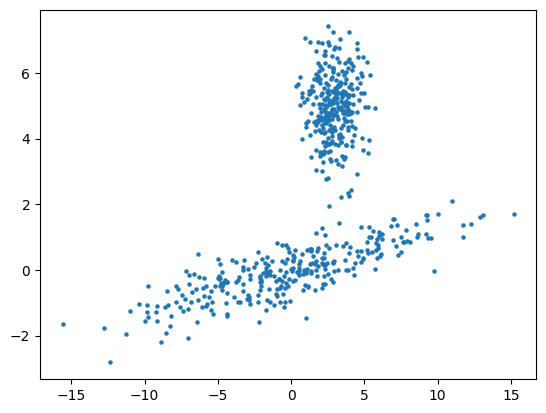

In [3]:
plt.scatter(X_train[:,0], X_train[:,1], s=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


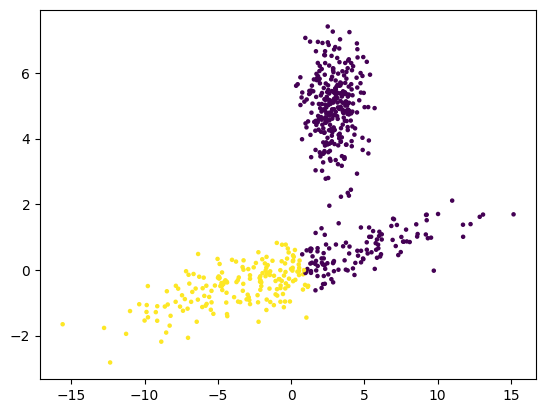

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

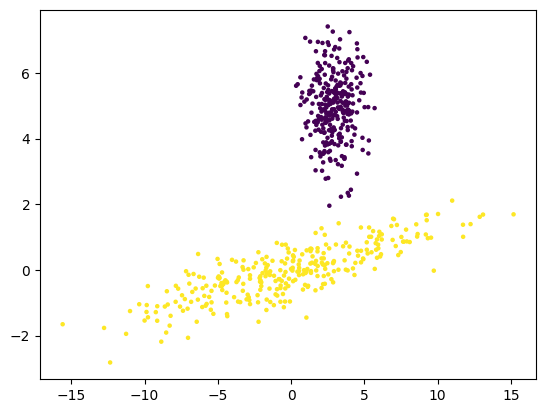

In [5]:
# fit a Gaussian Mixture Model with two components
gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(X_train)
predict = gmm.predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

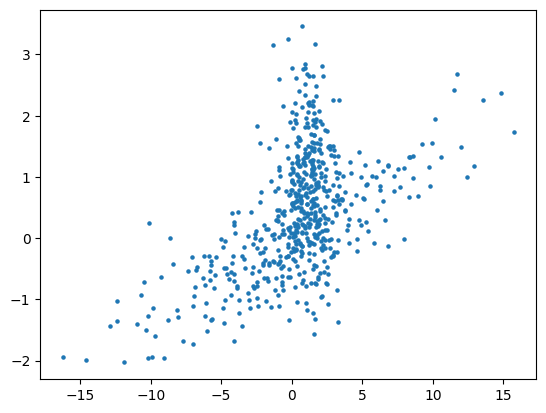

In [6]:
# example 2

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([1, 1])
C = np.array([[0.0, -0.5], [5.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
plt.scatter(X_train[:,0], X_train[:,1], s=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


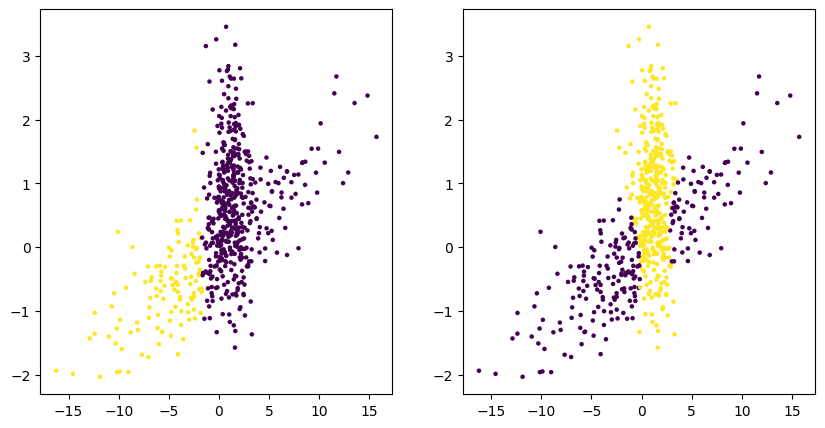

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)
plt.subplot(1,2,2)
mm = GaussianMixture(n_components=2, covariance_type="full")
gmm.fit(X_train)
predict = gmm.predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=predict, s=5)

[]

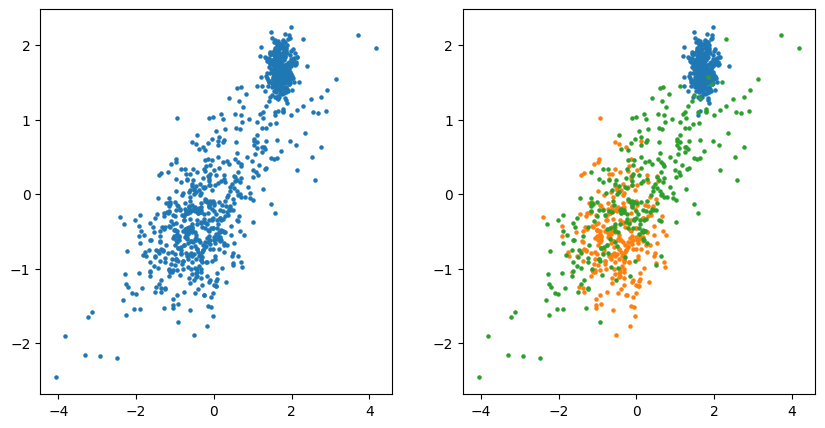

In [8]:
# example 3
n_samples = 300
gaussian1 = np.random.normal(1.7, 0.2, (n_samples, 2))
gaussian2 = np.random.normal(-0.5, 0.5, (n_samples, 2))
C = np.array([[0.0, 0.5], [1.3, 0.7]])
gaussian3 = np.dot(np.random.randn(n_samples, 2), C)
X = np.vstack([gaussian1, gaussian2, gaussian3])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s=5)
plt.subplot(1,2,2)
plt.scatter(gaussian1[:,0],gaussian1[:,1], s=5)
plt.scatter(gaussian2[:,0],gaussian2[:,1], s=5)
plt.scatter(gaussian3[:,0],gaussian3[:,1], s=5)
plt.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


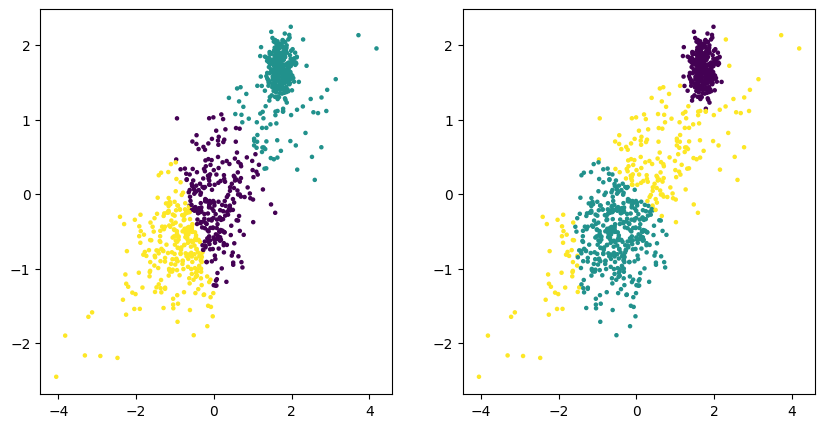

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict, s=5)

plt.subplot(1,2,2)
gmm = GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X)    # estimate parameters with the EM algorithm
predict = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=predict, s=5)

In [10]:
print(gmm.weights_ )    # weights of each mixture components
print(gmm.means_)       # the mean of each mixture components
print(gmm.covariances_) # The covariance of each mixture component. The shape depends on covariance_type:

[0.33135865 0.35002709 0.31861426]
[[ 1.70463781  1.68568402]
 [-0.48693474 -0.5382378 ]
 [ 0.04157777  0.04212761]]
[[[3.36192582e-02 1.63560165e-03]
  [1.63560165e-03 4.28842562e-02]]

 [[3.12258914e-01 3.27178139e-02]
  [3.27178139e-02 2.09576650e-01]]

 [[1.76050348e+00 8.94084779e-01]
  [8.94084779e-01 7.11116481e-01]]]


In [11]:
print(gmm.converged_) # True when convergence was reached in fit(), False otherwise.
print(gmm.n_iter_)    # Number of step used by the best fit of EM to reach the convergence.

True
13


In [12]:
X_new = ([[0.5, 1.3],
          [2.1, 0.5],
          [0.0, -0.5]])
gmm.predict(X_new), gmm.predict_proba(X_new)

(array([2, 2, 1]),
 array([[1.82890883e-08, 3.37944394e-03, 9.96620538e-01],
        [5.07308454e-07, 1.01083135e-04, 9.99898410e-01],
        [4.51777889e-41, 7.71636969e-01, 2.28363031e-01]]))

- log-likelihood
  - The likelihood values for individual data points can be quite small, especially when dealing with a large dataset. To avoid numerical issues arising from multiplying many small probabilities, it is common to work with the log-likelihood instead.
  - ln(P(X|θ))
  - measures how well the GMM fits the observed data
  - it serves as a useful relative metric for comparing different GMMs and assessing their performance.

In [13]:
gmm.score(X)   # per-sample average log-likelihood
               # a measure of how well the GMM fits the observed data
               # (closer to zero values indicate a better fit)
               #

-1.8808876215947943

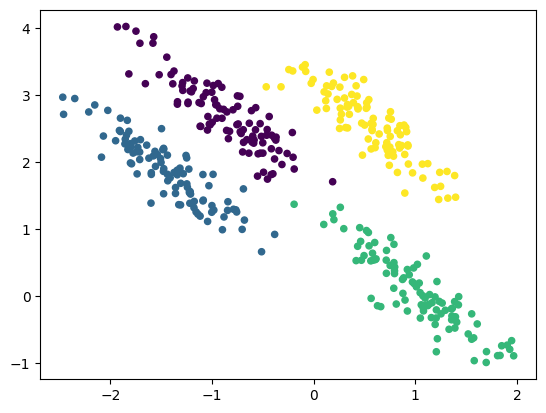

In [15]:
# example 4
from sklearn.datasets import make_blobs
X1, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
np.random.seed(13)
X2 = np.dot(X1, np.random.randn(2, 2))
plt.scatter(X2[:, 0], X2[:, 1], c=y_true, s=20, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


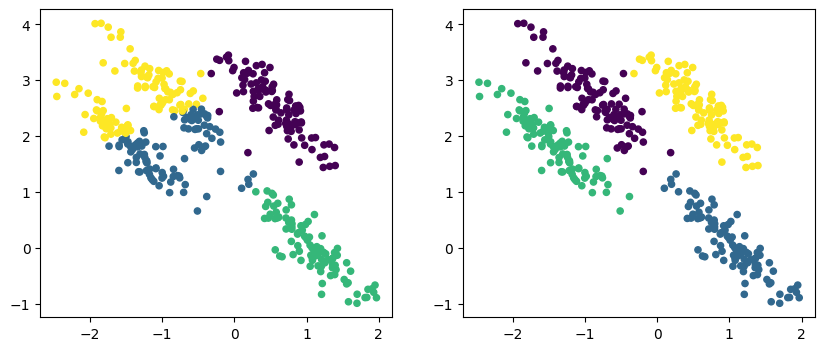

In [17]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=4, random_state=0)
k_labels = kmeans.fit_predict(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=k_labels, s=20, cmap='viridis');

plt.subplot(1,2,2)
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
gmm.fit(X2)    # estimate parameters with the EM algorithm
g_labels = gmm.predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=g_labels, s=20, cmap='viridis')

In [18]:
gmm.score(X2), np.exp(gmm.score(X2))

(-1.9184886179627711, 0.14682870878919427)

## Density Estimation (*Generative* Probablistic model)
**bold text**- the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.
- Good to generate arbitrary multi-dimensional distribution of data.

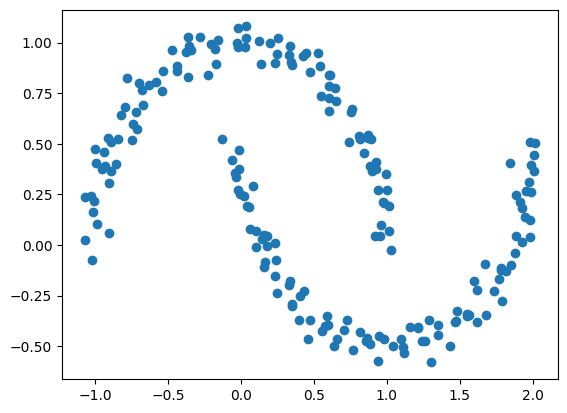

In [19]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

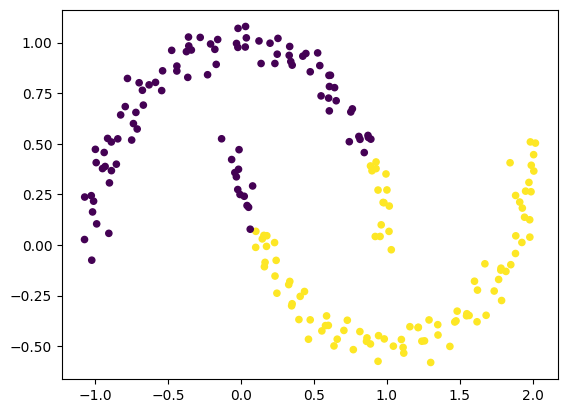

In [20]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm2.fit(Xmoon)    # estimate parameters with the EM algorithm
g_labels = gmm2.predict(Xmoon)
plt.scatter(Xmoon[:,0], Xmoon[:,1], c=g_labels, s=20, cmap='viridis')

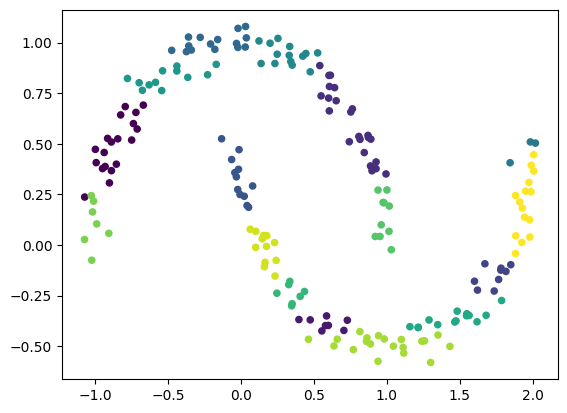

In [21]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
g_labels = gmm16.fit_predict(Xmoon)
plt.scatter(Xmoon[:,0], Xmoon[:,1], c=g_labels, s=20, cmap='viridis')

- The GMM gives us the recipe to generate new random data distributed similarly to our input.
- For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

<class 'tuple'> 2


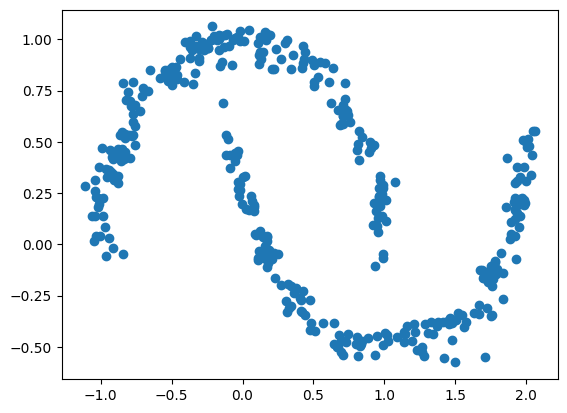

In [22]:
Xnew = gmm16.sample(400)       # returns a tuple (X, y)
print(type(Xnew), len(Xnew))
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1]);

- GMM is convenient as a flexible means of modeling an arbitrary multi-dimensional distribution of data.

------------------